In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append("../../")
import data_loading as dl
from importlib import reload
reload(dl)

from microfit import run_plotter as rp
from microfit import histogram as hist

from microfit import variable_definitions as vdef
from microfit import selections

In [2]:
#RUN = ["3"]
RUN = ["1","2","3"] #important that it's a string 1) new format to include latest runs 2) to include 'mc_pdg' otherwise it gets dropped

rundata, mc_weights, data_pot = dl.load_runs(
    RUN,
    data="bnb",
    loadpi0variables=False,
    loadshowervariables=True,
    loadrecoveryvars=True,
    load_nue_tki=True,
    loadsystematics=True,
    use_bdt=False,
    blinded=True,
    enable_cache=True,
)

get_rundict: run_number= 1
get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 1
Loading ntuple file /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run1/nuepresel/bnb_beam_off_peleeTuple_uboone_v08_00_00_70_run1.root
Calc true TKI variables for leading proton only
Calc reco TKI variables for leading proton only
is_mc= False


/exp/uboone/app/users/mmoudgal/miniforge3/envs/python3LEE/lib/python3.7/site-packages/pandas/core/generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['trk_llr_pid_score_v', 'backtracked_pdg', 'TrueProtonIdx',
       'Signal_1eNp', 'Signal_1e1p', 'shr_pt', 'trk_pt', 'delta_pt'],
      dtype='object')]

  encoding=encoding,


get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 1
Loading ntuple file /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run1/nuepresel/overlay_peleeTuple_uboone_v08_00_00_70_run1_nu.root


../../data_loading.py:782: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot / mc_p_prot, np.nan)


Calc true TKI variables for leading proton only
Calc reco TKI variables for leading proton only
is_mc= True


/exp/uboone/app/users/mmoudgal/miniforge3/envs/python3LEE/lib/python3.7/site-packages/pandas/core/generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['weightsReint', 'weightsFlux', 'weightsGenie', 'trk_llr_pid_score_v',
       'backtracked_pdg', 'TrueProtonIdx', 'Signal_1eNp', 'Signal_1e1p',
       'shr_pt', 'trk_pt', 'delta_pt'],
      dtype='object')]

  encoding=encoding,


get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 1
Loading ntuple file /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run1/nuepresel/overlay_peleeTuple_uboone_v08_00_00_70_run1_nue.root
Calc true TKI variables for leading proton only
Calc reco TKI variables for leading proton only
is_mc= True
get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 1
Loading ntuple file /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run1/nuepresel/overlay_peleeTuple_uboone_v08_00_00_70_run1_dirt.root
Calc true TKI variables for leading proton only
Calc reco TKI variables for leading proton only
is_mc= True
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 2
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 2
Loading ntuple file /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run2/nuepresel/bnb_beam_off_peleeTuple

In [4]:
# for key, df in rundata.items():
#     if key!='data':
#         df['TrueDeltaAlphaT'] = np.degrees(df['TrueDeltaAlphaT'])
#         df['RecoDeltaAlphaT'] = np.degrees(df['RecoDeltaAlphaT'])

In [3]:
from microfit import selections as sel

#print(sel.selection_categories)

selection = "OnePL"
preselection = "OneP"
query = f"{sel.preselection_categories[preselection]['query']} and {sel.selection_categories[selection]['query']}"
#print(query)

all_mc = pd.concat([df for k, df in rundata.items() if k!='data'])
#is_sig = all_mc['category_1e1p_tki'] == 12
is_sig = all_mc['Signal_1e1p'] == True
all_sig = all_mc.loc[is_sig]
sel_sig = all_sig.query(query, engine='python')

print(len(all_sig))

#plt.plot(sel_sig['TrueElecModMom'], sel_sig['mod_shr_p'], '+')


44748


In [24]:
variables = {
# #    '': {'reco': , 'truth': , 'nbins': , 'bounds': },
    'Proton Kinetic Energy [GeV]': {'reco': 'trk_energy', 'truth': 'TrueLeadProtonKE', 'nbins': 10, 'bounds': (0, 1), 'range': [[0,1.3],[0,1.3]]},
    'Proton Momentum [GeV/c]': {'reco': 'mod_trk_p', 'truth': 'TrueLeadProtonModMom', 'nbins': 20, 'bounds': (0, 1.5), 'range': [[0.1,2],[0.1,2]]},
    'Proton X Momentum [GeV/c]': {'reco': 'trk_px', 'truth': 'TrueLeadProtonMomX', 'nbins': 20, 'bounds': (-1, 1), 'range': [[-1,1.25],[-1,1.25]]},
    'Proton Y Momentum [GeV/c]': {'reco': 'trk_py', 'truth': 'TrueLeadProtonMomY', 'nbins': 20, 'bounds': (-1.5, 1.5), 'range': [[-1,1.5],[-1,1.5]]},
    'Proton Z Momentum [GeV/c]': {'reco': 'trk_pz', 'truth': 'TrueLeadProtonMomZ', 'nbins': 20, 'bounds': (-1, 1.5),'range': [[-1,2],[-1,2]]},
    'Electron Kinetic Energy [GeV]': {'reco': 'shr_energy_cali', 'truth': 'TrueElecKE', 'nbins': 16, 'bounds': (0, 4), 'range': [[0,4.6],[0,4.6]]},
    'Electron Momentum [GeV/c]': {'reco': 'mod_shr_p', 'truth': 'TrueElecModMom', 'nbins': 20, 'bounds': (0, 5), 'range': [[0,4.6],[0,4.6]]},
    'Electron X Momentum [GeV/c]': {'reco': 'shr_px', 'truth': 'TrueElecMomX', 'nbins': 12, 'bounds': (-1.5, 1.5), 'range': [[-1,1],[-1,1]]},
    'Electron Y Momentum [GeV/c]': {'reco': 'shr_py', 'truth': 'TrueElecMomY', 'nbins': 12, 'bounds': (-1.5, 1.5), 'range': [[-1,1],[-1,1]]},
    'Electron Z Momentum [GeV/c]': {'reco': 'shr_pz', 'truth': 'TrueElecMomZ', 'nbins': 12, 'bounds': (-1, 5), 'range': [[0,4.6],[0,4.6]]},
    '$\\delta p_T$ [GeV/c]': {'reco': 'RecoDeltaPT', 'truth': 'TrueDeltaPT', 'nbins': 20, 'bounds': (0, 2), 'range': [[0,1.75],[0,1.75]]},
    '$\\delta \\alpha_T$ [degrees]': {'reco': 'RecoDeltaAlphaT', 'truth': 'TrueDeltaAlphaT', 'nbins': 20, 'bounds': (0, 180), 'range': [[0,180],[0,180]]},
}
    
#     'Hybrid Electron Z Momentum v1': {'reco': 'hybrid_elec_pz_v1', 'truth': 'elec_pz', 'nbins': 12, 'bounds': (-1, 5)},
#     'Hybrid Electron Z Momentum v2': {'reco': 'hybrid_elec_pz_v2', 'truth': 'elec_pz', 'nbins': 12, 'bounds': (-1, 5)},


from matplotlib.colors import LogNorm

for k, var in variables.items():
    #print(type(k))
    truth = variables[k]['truth']
    reco = variables[k]['reco']
    bounds = variables[k]['range']
    
    H, xedges, yedges = np.histogram2d(sel_sig[truth], sel_sig[reco], bins=100, range=bounds)
    X, Y = np.meshgrid(xedges,yedges)
    plt.pcolormesh(X, Y, H.T, shading='flat', norm=LogNorm())
    plt.colorbar()
    plt.xlabel(f'True {k}')
    plt.ylabel(f'Reco {k}')
    
    plt.title(f"True signal events with {sel.preselection_categories[preselection]['title']} and {sel.selection_categories[selection]['title']}")
    plt.savefig(f'plots/resolution_plots/resolution_2Dplots_Run123_{preselection}_{selection}_{truth}.pdf', bbox_inches='tight')
    
    plt.clf()


<Figure size 640x480 with 0 Axes>

In [7]:
# DeltaAlphaT Slice plots - fractional

slices = ['0 < RecoDeltaAlphaT < 20',
          '20 < RecoDeltaAlphaT < 40',
          '40 < RecoDeltaAlphaT < 60',
          '60 < RecoDeltaAlphaT < 80',
          '80 < RecoDeltaAlphaT < 100',
          '100 < RecoDeltaAlphaT < 120',
          '120 < RecoDeltaAlphaT < 140',
          '140 < RecoDeltaAlphaT < 160',
          '160 < RecoDeltaAlphaT < 180',
         ]

for s in slices:
    df = sel_sig.query(s)
    reco = 'RecoDeltaAlphaT'
    truth = 'TrueDeltaAlphaT'
    
    resolution = (df[reco] - df[truth]) #/ df[truth]
    mean = np.mean(resolution)
    std = np.std(resolution)
    rms = np.sqrt(np.mean(np.square(resolution)))
    
    text = f"Mean: {mean:.2f} \n Std: {std:.2f} \n RMS: {rms:.2f}"
    plt.text(0.95, 0.95, text, ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor="white", edgecolor="none", alpha=0.8))
    plt.hist(resolution, bins=20)
    #plt.yscale('log')
    #plt.hist(resolution, bins=20, range=(-1, 1))
    plt.xlabel(f'(Reco - True) / True $\\delta \\alpha_T$')
    plt.ylabel('Frequency')
    plt.title(f"True signal events with {sel.preselection_categories[preselection]['title']} and {sel.selection_categories[selection]['title']} \n {s}")
    
    plt.savefig(f'plots/resolution_plots/test_resolution_Run123_{preselection}_{selection}_{reco}_{s}.pdf', bbox_inches='tight')
    
    plt.clf()

<Figure size 640x480 with 0 Axes>

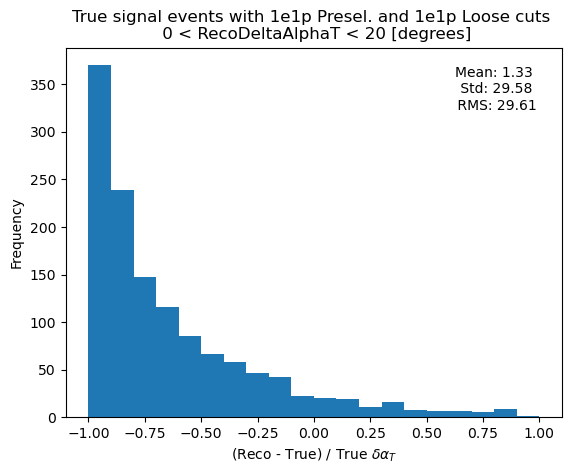

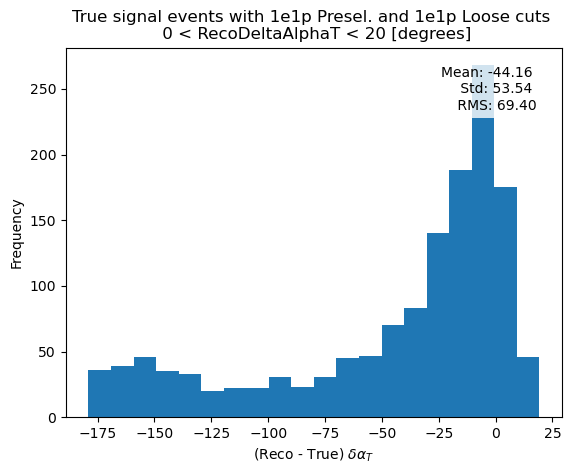

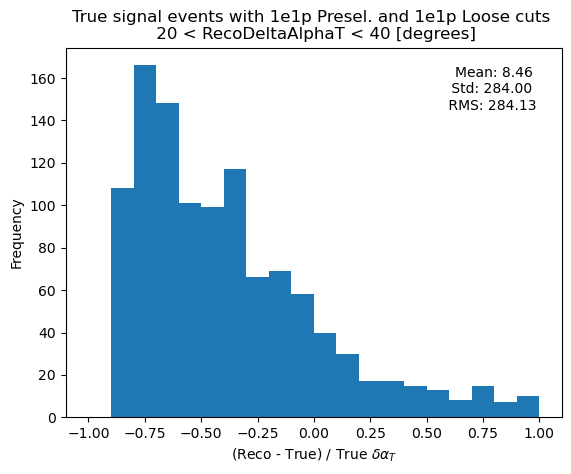

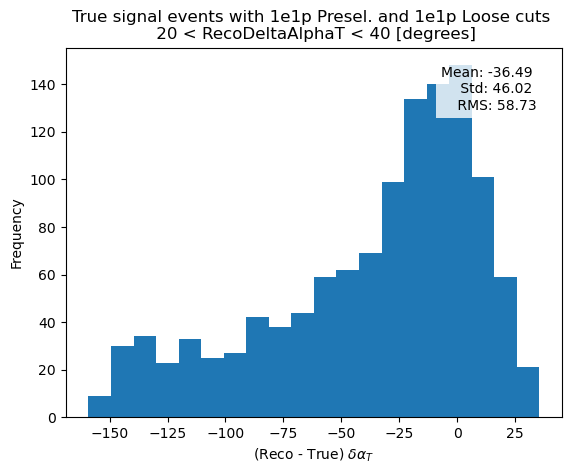

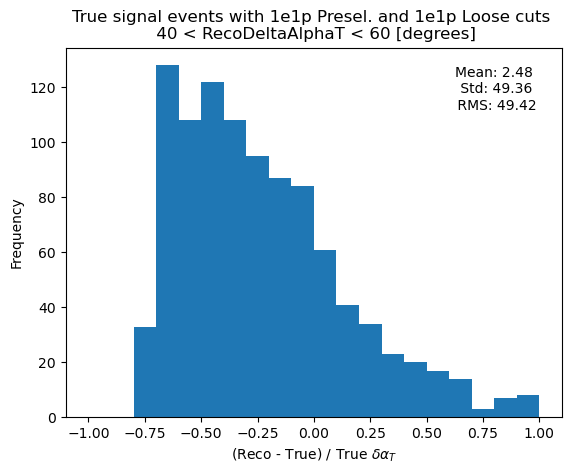

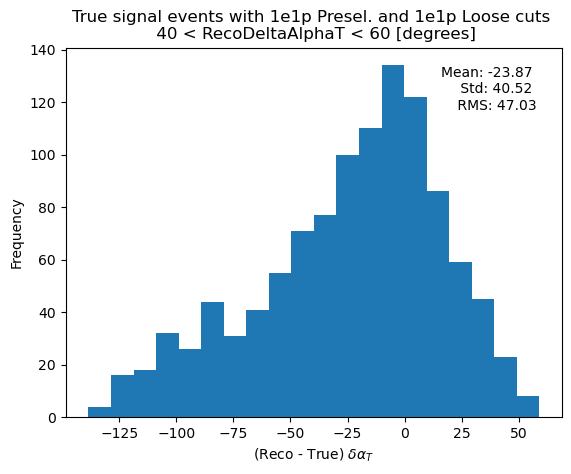

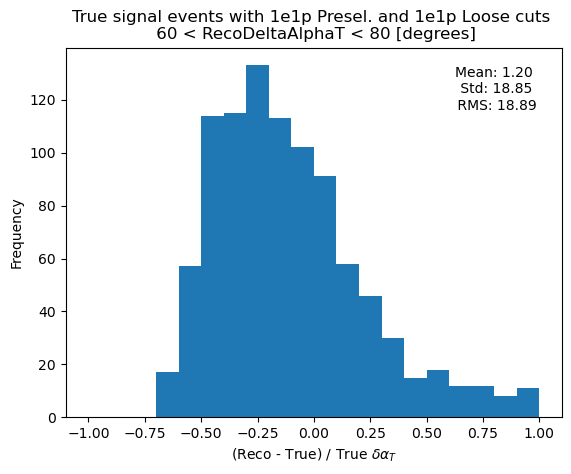

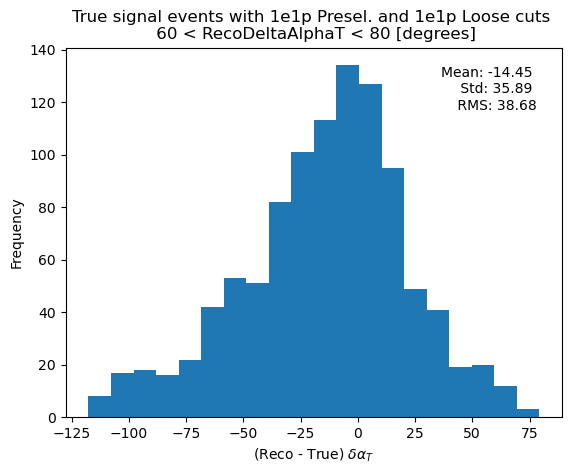

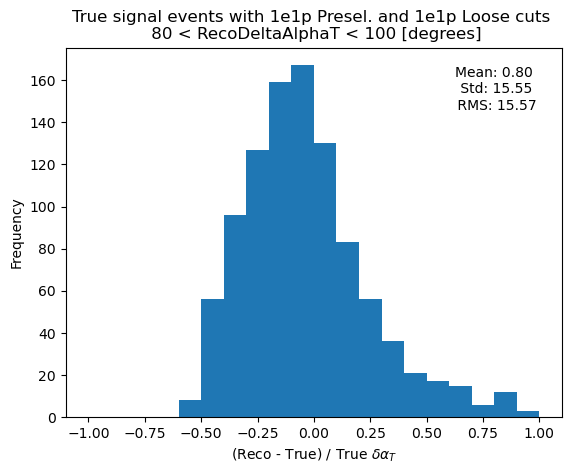

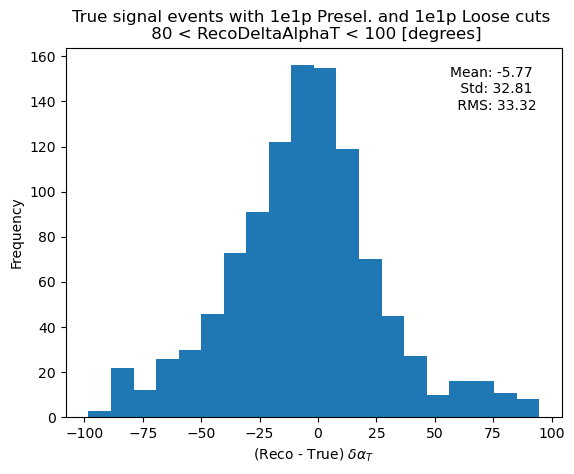

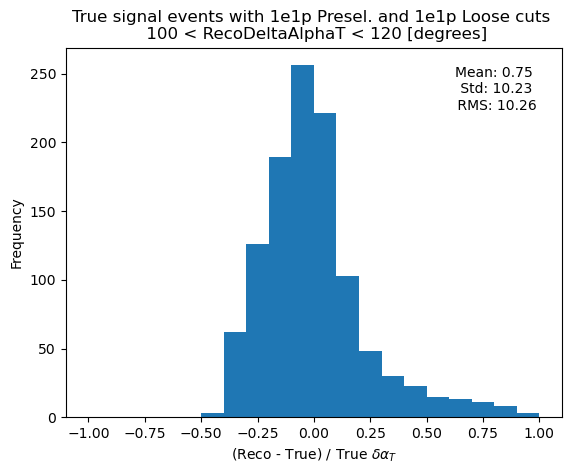

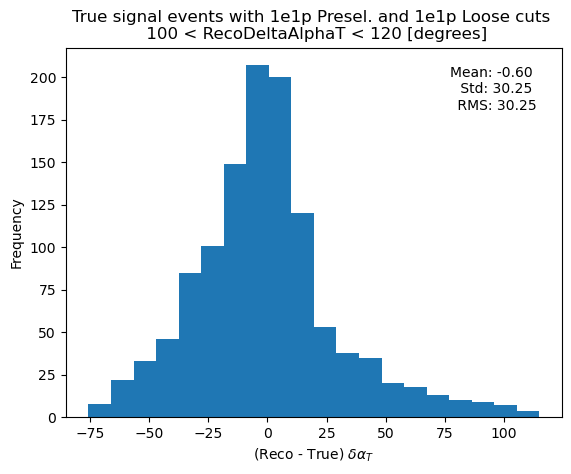

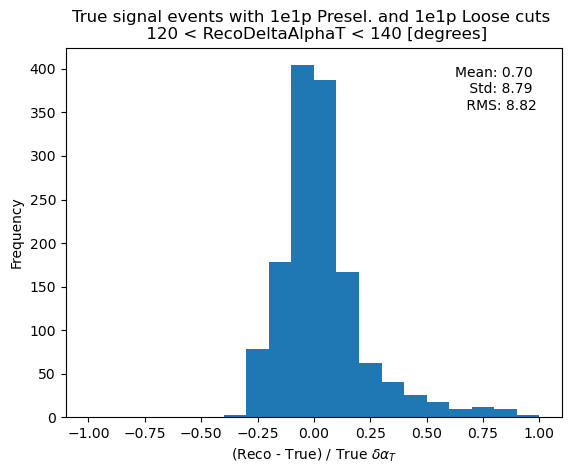

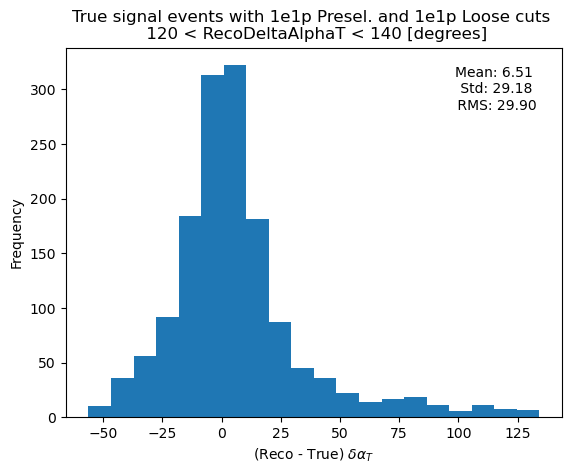

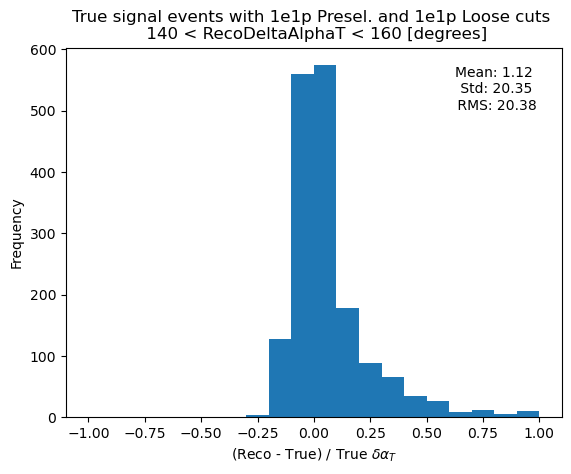

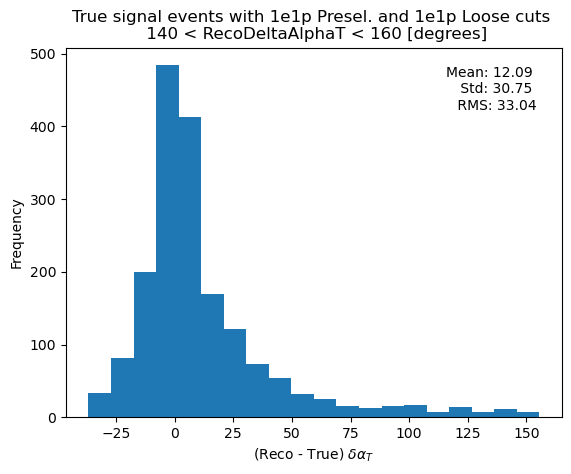

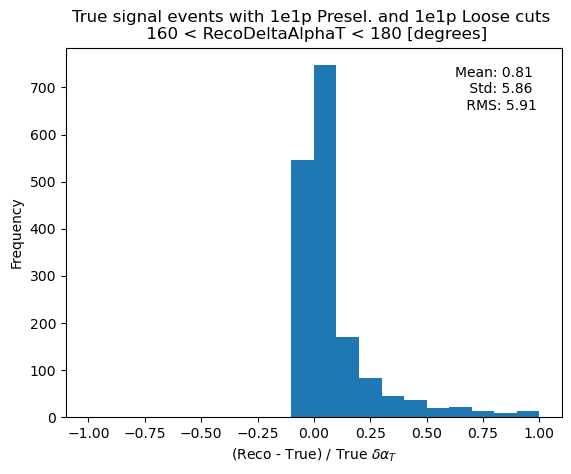

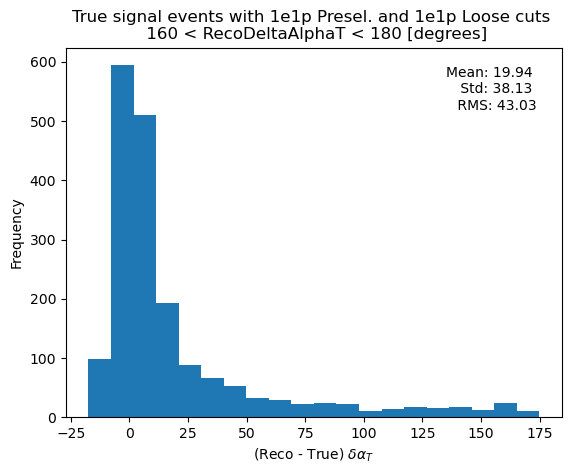

In [11]:
# DeltaAlphaT Slice plots - fractional and difference

slices = ['0 < RecoDeltaAlphaT < 20',
          '20 < RecoDeltaAlphaT < 40',
          '40 < RecoDeltaAlphaT < 60',
          '60 < RecoDeltaAlphaT < 80',
          '80 < RecoDeltaAlphaT < 100',
          '100 < RecoDeltaAlphaT < 120',
          '120 < RecoDeltaAlphaT < 140',
          '140 < RecoDeltaAlphaT < 160',
          '160 < RecoDeltaAlphaT < 180',
         ]

for s in slices:
    df = sel_sig.query(s)
    reco = 'RecoDeltaAlphaT'
    truth = 'TrueDeltaAlphaT'
    
    # Fractional
    
    resolution = (df[reco] - df[truth]) / df[truth]
    mean = np.mean(resolution)
    std = np.std(resolution)
    rms = np.sqrt(np.mean(np.square(resolution)))
    text = f"Mean: {mean:.2f} \n Std: {std:.2f} \n RMS: {rms:.2f}"
    
    fig, ax = plt.subplots()
    
    ax.hist(resolution, bins=20, range=(-1, 1))
    ax.set_xlabel(f'(Reco - True) / True $\\delta \\alpha_T$')
    ax.set_ylabel('Frequency')
    ax.text(0.95, 0.95, text, ha='right', va='top', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor="white", edgecolor="none", alpha=0.8))
    ax.set_title(f"True signal events with {sel.preselection_categories[preselection]['title']} and {sel.selection_categories[selection]['title']} \n {s} [degrees]")
    plt.savefig(f'plots/resolution_plots/frac_resolution_Run123_{preselection}_{selection}_{reco}_{s}.pdf', bbox_inches='tight')
    plt.show()
    #plt.clf()
    
    # Difference
    
    resolution = (df[reco] - df[truth])
    mean = np.mean(resolution)
    std = np.std(resolution)
    rms = np.sqrt(np.mean(np.square(resolution)))
    text = f"Mean: {mean:.2f} \n Std: {std:.2f} \n RMS: {rms:.2f}"
    
    fig, ax2 = plt.subplots()
    

    ax2.hist(resolution, bins=20)
    ax2.set_xlabel(f'(Reco - True) $\\delta \\alpha_T$')
    ax2.set_ylabel('Frequency')
    ax2.text(0.95, 0.95, text, ha='right', va='top', transform=ax2.transAxes, fontsize=10, bbox=dict(facecolor="white", edgecolor="none", alpha=0.8))
    ax2.set_title(f"True signal events with {sel.preselection_categories[preselection]['title']} and {sel.selection_categories[selection]['title']} \n {s} [degrees]")
    plt.savefig(f'plots/resolution_plots/diff_resolution_Run123_{preselection}_{selection}_{reco}_{s}.pdf', bbox_inches='tight')
    plt.show()

In [8]:
# DeltaPT Slice plots - fractional

slices = ['0 < RecoDeltaPT < 0.1',
          '0.1 < RecoDeltaPT < 0.2',
          '0.2 < RecoDeltaPT < 0.3',
          '0.3 < RecoDeltaPT < 0.4',
          '0.4 < RecoDeltaPT < 0.5',
          '0.5 < RecoDeltaPT < 0.6',
          '0.6 < RecoDeltaPT < 0.7',
          '0.7 < RecoDeltaPT < 0.8',
         ]

for s in slices:
    df = sel_sig.query(s)
    reco = 'RecoDeltaPT'
    truth = 'TrueDeltaPT'
    
    resolution = (df[reco] - df[truth]) / df[truth]
    mean = np.mean(resolution)
    std = np.std(resolution)
    rms = np.sqrt(np.mean(np.square(resolution)))
    
    text = f"Mean: {mean:.2f} \n Std: {std:.2f} \n RMS: {rms:.2f}"
    plt.text(0.95, 0.95, text, ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor="white", edgecolor="none", alpha=0.8))
    plt.hist(resolution, bins=20, range=(-1, 1))
    plt.xlabel(f'(Reco - True) / True $\\delta p_T$')
    plt.ylabel('Frequency')
    plt.title(f"True signal events with {sel.preselection_categories[preselection]['title']} and {sel.selection_categories[selection]['title']} \n {s}")
    
    plt.savefig(f'plots/resolution_plots/resolution_Run123_{preselection}_{selection}_{reco}_{s}.pdf', bbox_inches='tight')
    
    plt.clf()

<Figure size 640x480 with 0 Axes>

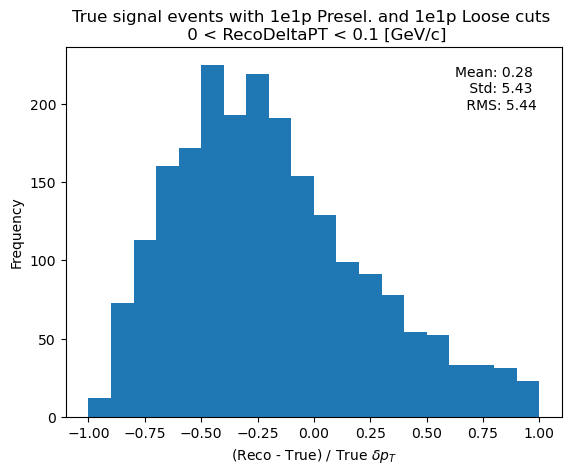

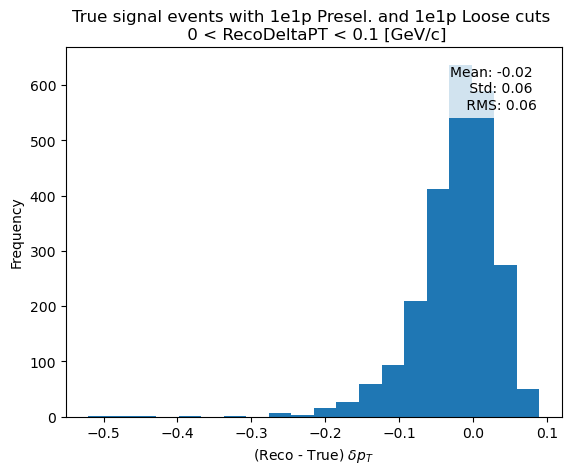

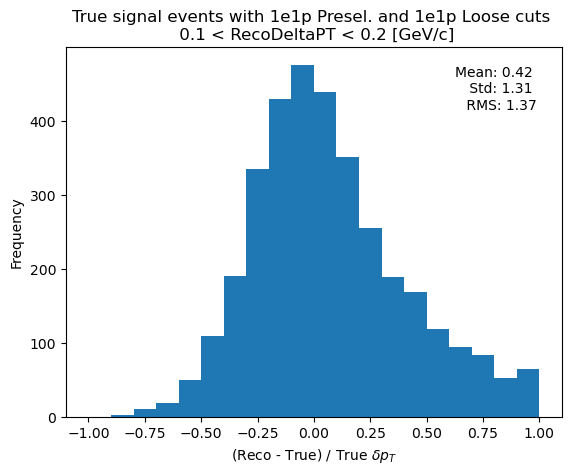

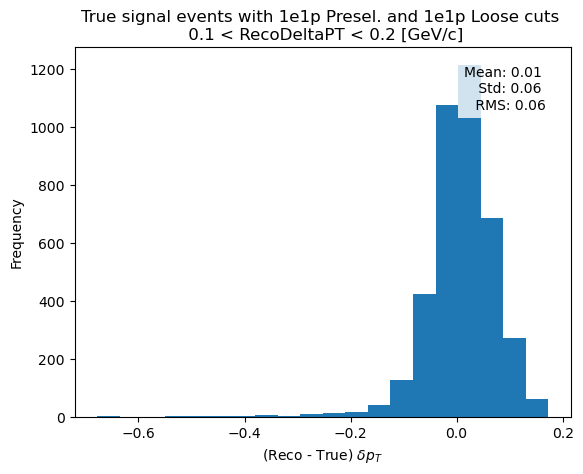

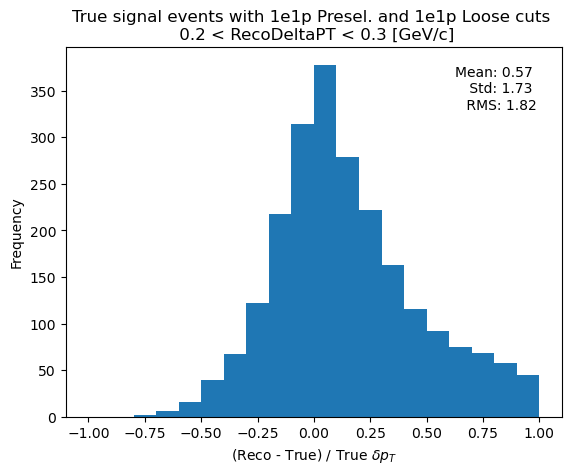

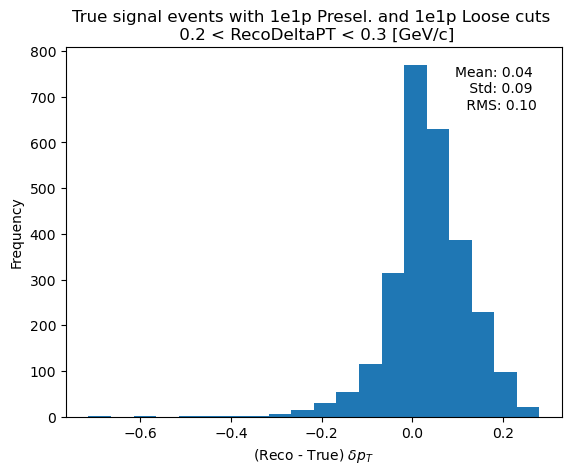

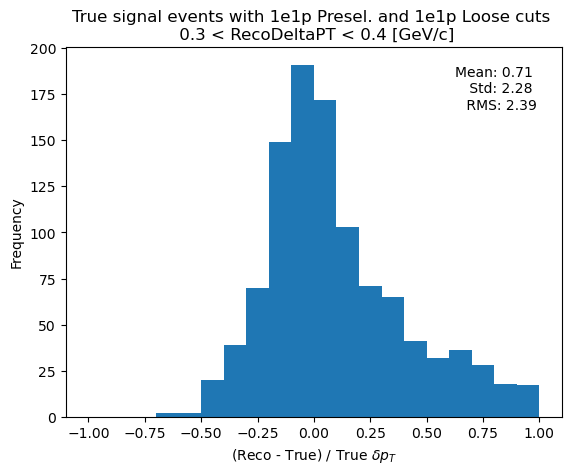

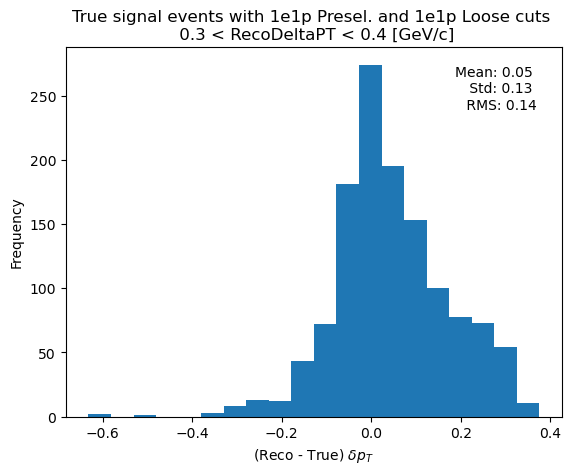

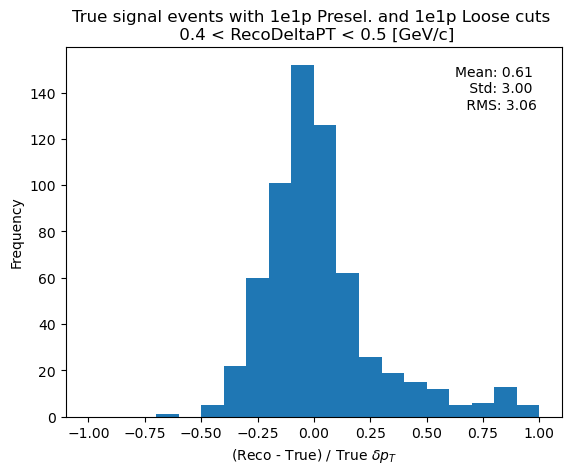

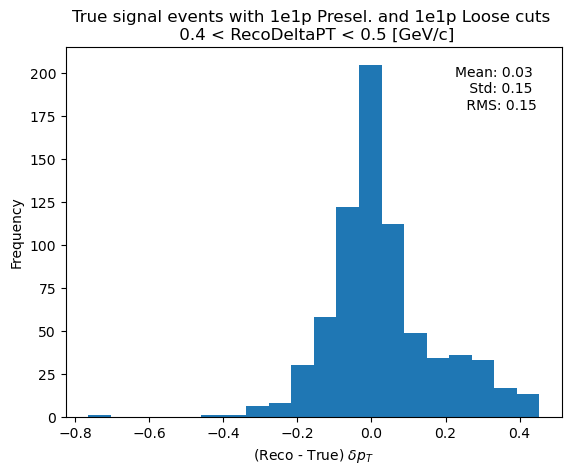

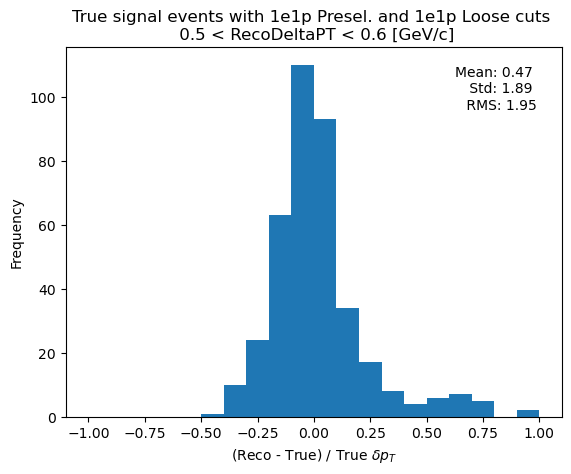

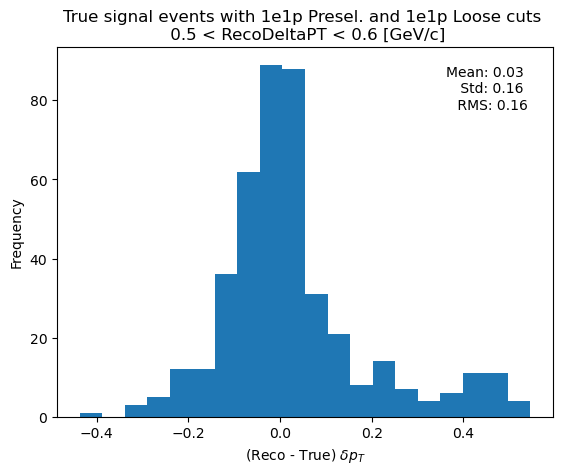

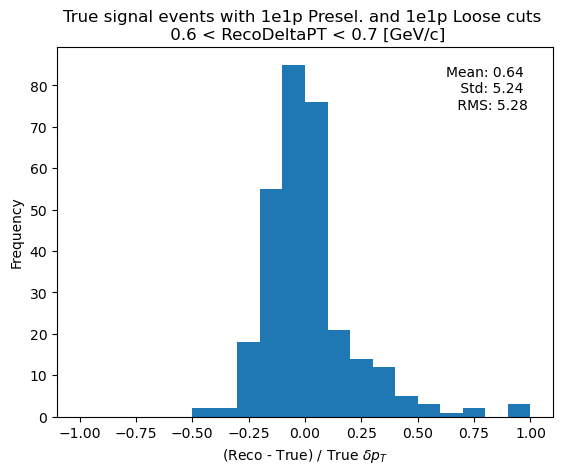

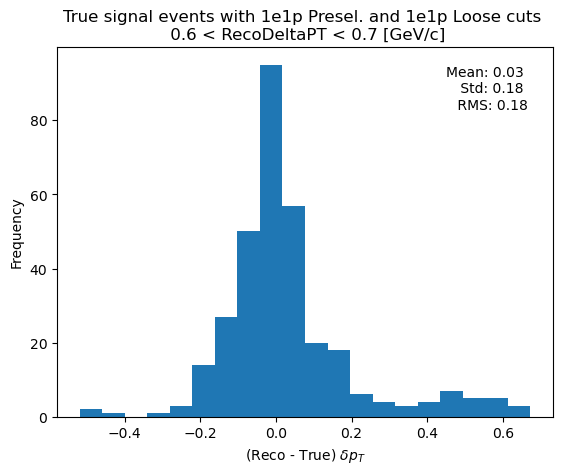

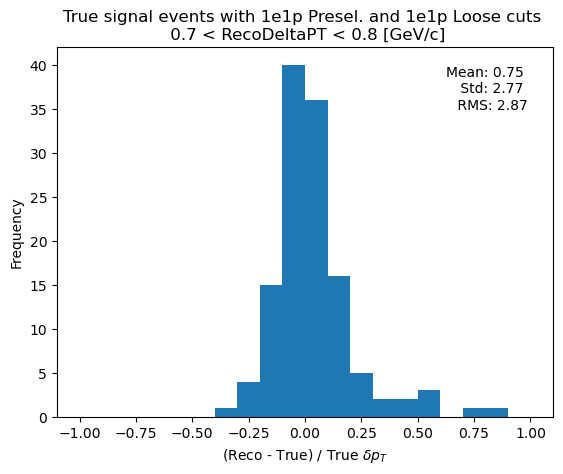

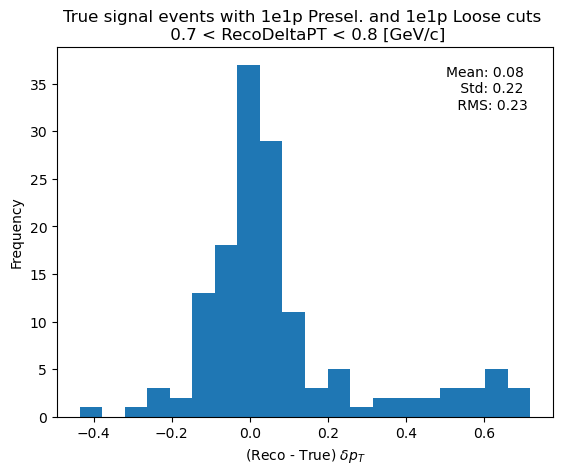

In [14]:
# DeltaPT Slice plots - fractional and difference

slices = ['0 < RecoDeltaPT < 0.1',
          '0.1 < RecoDeltaPT < 0.2',
          '0.2 < RecoDeltaPT < 0.3',
          '0.3 < RecoDeltaPT < 0.4',
          '0.4 < RecoDeltaPT < 0.5',
          '0.5 < RecoDeltaPT < 0.6',
          '0.6 < RecoDeltaPT < 0.7',
          '0.7 < RecoDeltaPT < 0.8',
         ]

for s in slices:
    df = sel_sig.query(s)
    reco = 'RecoDeltaPT'
    truth = 'TrueDeltaPT'
    
    # Fractional
    
    resolution = (df[reco] - df[truth]) / df[truth]
    mean = np.mean(resolution)
    std = np.std(resolution)
    rms = np.sqrt(np.mean(np.square(resolution)))
    text = f"Mean: {mean:.2f} \n Std: {std:.2f} \n RMS: {rms:.2f}"
    
    fig, ax = plt.subplots()
    
    ax.hist(resolution, bins=20, range=(-1, 1))
    ax.set_xlabel(f'(Reco - True) / True $\\delta p_T$')
    ax.set_ylabel('Frequency')
    ax.text(0.95, 0.95, text, ha='right', va='top', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor="white", edgecolor="none", alpha=0.8))
    ax.set_title(f"True signal events with {sel.preselection_categories[preselection]['title']} and {sel.selection_categories[selection]['title']} \n {s} [GeV/c]")
    plt.savefig(f'plots/resolution_plots/frac_resolution_Run123_{preselection}_{selection}_{reco}_{s}.pdf', bbox_inches='tight')
    plt.show()
    #plt.clf()
    
    # Difference
    
    resolution = (df[reco] - df[truth])
    mean = np.mean(resolution)
    std = np.std(resolution)
    rms = np.sqrt(np.mean(np.square(resolution)))
    text = f"Mean: {mean:.2f} \n Std: {std:.2f} \n RMS: {rms:.2f}"
    
    fig, ax2 = plt.subplots()
    

    ax2.hist(resolution, bins=20)
    ax2.set_xlabel(f'(Reco - True) $\\delta p_T$')
    ax2.set_ylabel('Frequency')
    ax2.text(0.95, 0.95, text, ha='right', va='top', transform=ax2.transAxes, fontsize=10, bbox=dict(facecolor="white", edgecolor="none", alpha=0.8))
    ax2.set_title(f"True signal events with {sel.preselection_categories[preselection]['title']} and {sel.selection_categories[selection]['title']} \n {s} [GeV/c]")
    plt.savefig(f'plots/resolution_plots/diff_resolution_Run123_{preselection}_{selection}_{reco}_{s}.pdf', bbox_inches='tight')
    plt.show()

In [17]:
slices = ['0.1 < shr_energy_cali < 0.2',
          '0.2 < shr_energy_cali < 0.3',
          '0.3 < shr_energy_cali < 0.4',
          '0.4 < shr_energy_cali < 0.5',
          '0.5 < shr_energy_cali < 0.6',
          '0.6 < shr_energy_cali < 0.7',
          '0.7 < shr_energy_cali < 0.8',
          '0.8 < shr_energy_cali < 0.9',
          '0.9 < shr_energy_cali < 1.',
          '1. < shr_energy_cali < 1.1',
          '1.1 < shr_energy_cali < 1.2',
         ]

for s in slices:
    df = sel_sig.query(s)
    reco = 'shr_energy_cali'
    truth = 'TrueElecKE'
    
    resolution = (df[reco] - df[truth]) / df[truth]
    mean = np.mean(resolution)
    std = np.std(resolution)
    rms = np.sqrt(np.mean(np.square(resolution)))
    
    text = f"Mean: {mean:.2f} \n Std: {std:.2f} \n RMS: {rms:.2f}"
    plt.text(0.95, 0.95, text, ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor="white", edgecolor="none", alpha=0.8))
    plt.hist(resolution, bins=20, range=(-1, 1))
    plt.xlabel(f'(Reco - True) / True Electron Kinetic Energy')
    plt.ylabel('Frequency')
    plt.title(f"True signal events with {sel.preselection_categories[preselection]['title']} and {sel.selection_categories[selection]['title']} \n {s}")
    
    plt.savefig(f'plots/resolution_plots/resolution_Run123_{preselection}_{selection}_{reco}_{s}.pdf', bbox_inches='tight')
    
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [7]:
slices = ['0.1 < mod_shr_p < 0.2',
          '0.2 < mod_shr_p < 0.3',
          '0.3 < mod_shr_p < 0.4',
          '0.4 < mod_shr_p < 0.5',
          '0.5 < mod_shr_p < 0.6',
          '0.6 < mod_shr_p < 0.7',
          '0.7 < mod_shr_p < 0.8',
          '0.8 < mod_shr_p < 0.9',
          '0.9 < mod_shr_p < 1.',
          '1. < mod_shr_p < 1.1',
          '1.1 < mod_shr_p < 1.2',
         ]

for s in slices:
    df = sel_sig.query(s)
    reco = 'mod_shr_p'
    truth = 'TrueElecModMom'
    
    resolution = (df[reco] - df[truth]) / df[truth]
    mean = np.mean(resolution)
    std = np.std(resolution)
    rms = np.sqrt(np.mean(np.square(resolution)))
    
    text = f"Mean: {mean:.2f} \n Std: {std:.2f} \n RMS: {rms:.2f}"
    plt.text(0.95, 0.95, text, ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor="white", edgecolor="none", alpha=0.8))
    plt.hist(resolution, bins=20, range=(-1, 1))
    plt.xlabel(f'(Reco - True) / True Electron Momentum')
    plt.ylabel('Frequency')
    plt.title(f"True signal events with {sel.preselection_categories[preselection]['title']} and {sel.selection_categories[selection]['title']} \n {s}")
    
    plt.savefig(f'plots/resolution_plots/resolution_Run123_{preselection}_{selection}_{reco}_{s}.pdf', bbox_inches='tight')
    
    plt.clf()

<Figure size 640x480 with 0 Axes>

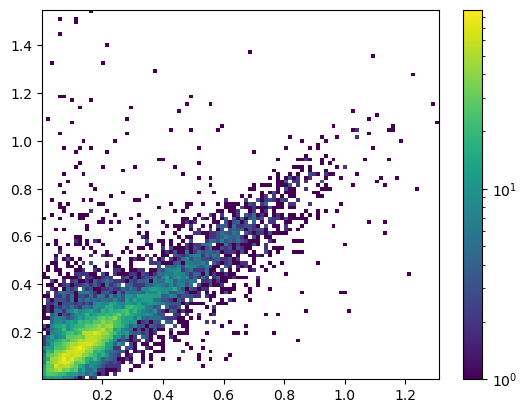

In [21]:
from matplotlib.colors import LogNorm

H, xedges, yedges = np.histogram2d(sel_sig['TrueDeltaPT'], sel_sig['RecoDeltaPT'], bins=100, range=None)
X, Y = np.meshgrid(xedges,yedges)
plt.pcolormesh(X, Y, H.T, shading='flat', norm=LogNorm())
plt.colorbar()

# print(xedges)
# print(yedges)

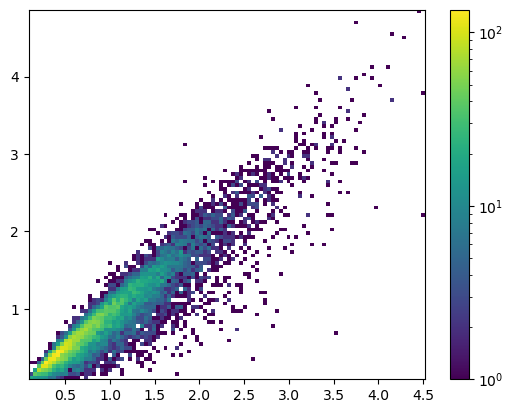

In [77]:
from matplotlib.colors import LogNorm

H, xedges, yedges = np.histogram2d(sel_sig['TrueElecModMom'], sel_sig['mod_shr_p'], bins=100)
X, Y = np.meshgrid(xedges,yedges)
plt.pcolormesh(X, Y, H.T, shading='flat', norm=LogNorm())
plt.colorbar()

# print(xedges)
# print(yedges)

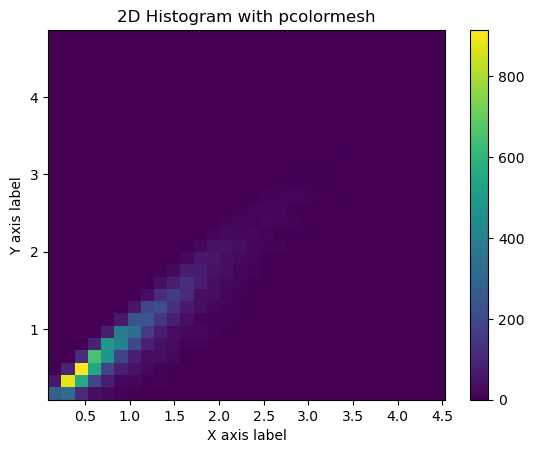

In [36]:
# Step 2: Compute the 2D histogram
hist, xedges, yedges = np.histogram2d(sel_sig['TrueElecModMom'], sel_sig['mod_shr_p'], bins=30)

# Step 3: Display the histogram
X, Y = np.meshgrid(xedges, yedges)
plt.pcolormesh(X, Y, hist.T)  # Note the .T for transposing the histogram to match the coordinates

plt.colorbar()  # Optionally add a colorbar to show the scale
plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('2D Histogram with pcolormesh')
plt.show()

(array([669., 598., 573., 519., 544., 475., 484., 457., 447., 462., 501.,
        478., 559., 583., 671., 767., 789., 841., 837., 836.]),
 array([7.87603296e-05, 8.99952687e+00, 1.79989750e+01, 2.69984231e+01,
        3.59978712e+01, 4.49973193e+01, 5.39967674e+01, 6.29962155e+01,
        7.19956636e+01, 8.09951117e+01, 8.99945599e+01, 9.89940080e+01,
        1.07993456e+02, 1.16992904e+02, 1.25992352e+02, 1.34991800e+02,
        1.43991249e+02, 1.52990697e+02, 1.61990145e+02, 1.70989593e+02,
        1.79989041e+02]),
 <BarContainer object of 20 artists>)

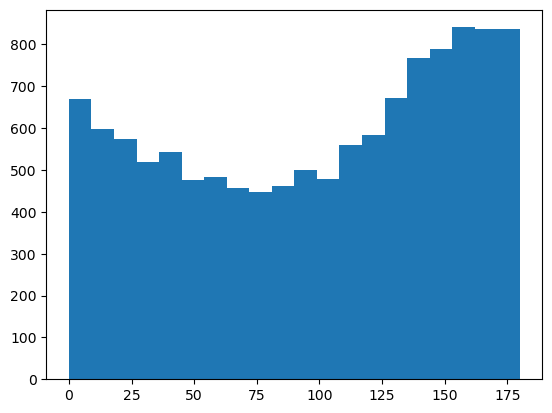

In [18]:
plt.hist(sel_sig['RecoDeltaAlphaT'], 20)

(array([1.641e+03, 2.843e+03, 2.314e+03, 1.747e+03, 1.191e+03, 8.650e+02,
        5.290e+02, 3.460e+02, 2.350e+02, 1.210e+02, 9.600e+01, 6.400e+01,
        4.400e+01, 2.100e+01, 1.200e+01, 1.000e+01, 7.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00]),
 array([0.08809389, 0.32692423, 0.56575456, 0.8045849 , 1.04341524,
        1.28224557, 1.52107591, 1.75990625, 1.99873658, 2.23756692,
        2.47639725, 2.71522759, 2.95405793, 3.19288826, 3.4317186 ,
        3.67054893, 3.90937927, 4.14820961, 4.38703994, 4.62587028,
        4.86470062]),
 <BarContainer object of 20 artists>)

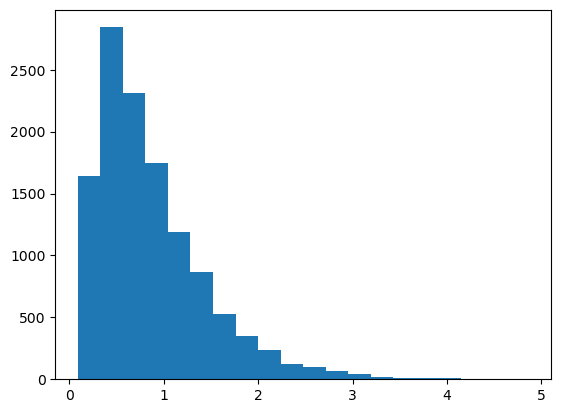

In [33]:
plt.hist(sel_sig['mod_shr_p'], 20)

In [8]:
df = all_mc.query(query, engine='python')

(array([ 466.,  504.,  468.,  500.,  490.,  540.,  541.,  538.,  588.,
         611.,  676.,  768.,  849.,  913., 1025., 1075., 1078., 1123.,
        1065., 1046.]),
 array([6.30713893e-05, 1.57138242e-01, 3.14213412e-01, 4.71288582e-01,
        6.28363753e-01, 7.85438923e-01, 9.42514093e-01, 1.09958926e+00,
        1.25666443e+00, 1.41373960e+00, 1.57081477e+00, 1.72788994e+00,
        1.88496512e+00, 2.04204029e+00, 2.19911546e+00, 2.35619063e+00,
        2.51326580e+00, 2.67034097e+00, 2.82741614e+00, 2.98449131e+00,
        3.14156648e+00]),
 <BarContainer object of 20 artists>)

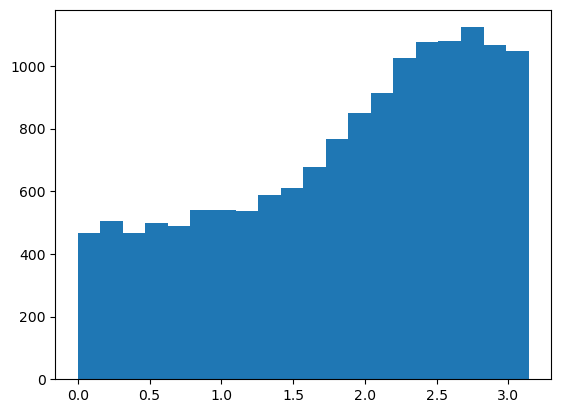

In [15]:
plt.hist(df['TrueDeltaAlphaT'], 20)